In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load dataset
d_df = pd.read_csv('../data/garmin/dailies.csv', sep=',')

# Trim columns
#d_df = d_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Steps', 'Stress Duration (s)']]

# Convert timestamp values
d_df['Calendar Date (Local)'] = pd.to_datetime(d_df['Calendar Date (Local)'])
d_df['Start Time (Local)'] = pd.to_datetime(d_df['Start Time (Local)'])
d_df['End Time (Local)'] = pd.to_datetime(d_df['End Time (Local)'])

# Select user = P12 and day = 2023-12-24
#d_df = d_df[d_df['User First Name'] == 'P12']
#d_df = d_df[d_df['Calendar Date (Local)'] == '2023-12-24']

In [22]:
# Load dataset
s_df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
s_df = s_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source', 'Sleep Efficiency', 'Sleep Score Value']]

# Convert data types
s_df['Calendar Date (Local)'] = pd.to_datetime(s_df['Calendar Date (Local)'])

# Add column with calculated sleep hours
s_df['Duration (h)'] = s_df['Duration (s)'] / 60 / 60
s_df['Deep Sleep Duration (h)'] = s_df['Deep Sleep Duration (s)'] / 60 / 60
s_df['Light Sleep Duration (h)'] = s_df['Light Sleep Duration (s)'] / 60 / 60
s_df['Rem Sleep Duration (h)'] = s_df['Rem Sleep Duration (s)'] / 60 / 60

In [23]:

df_users = s_df.drop_duplicates(subset=['Calendar Date (Local)', 'User First Name'])

# Filter for device source
df_users = df_users[df_users['Source'] == 'device']

print(df_users['User First Name'].unique())

df_users

['P10' 'P11' 'P12' 'P14']


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.600000,2.333333
196,P10,2023-12-24,2023-12-24T01:13:00,2023-12-24T08:56:00,27780,6000,5580,15060,device,0.958963,81.0,7.716667,1.550000,4.183333,1.666667
276,P10,2023-12-25,2023-12-25T01:07:00,2023-12-25T09:41:00,30840,11160,6780,12900,device,1.000000,91.0,8.566667,1.883333,3.583333,3.100000
320,P10,2023-12-26,2023-12-26T01:50:00,2023-12-26T09:03:00,25980,6960,6240,12780,device,1.000000,90.0,7.216667,1.733333,3.550000,1.933333
339,P10,2023-12-27,2023-12-27T01:20:00,2023-12-27T09:16:00,28560,8040,5460,14640,device,0.985294,98.0,7.933333,1.516667,4.066667,2.233333
363,P10,2023-12-28,2023-12-28T00:54:00,2023-12-28T08:48:00,28440,6660,6960,14280,device,0.981013,91.0,7.900000,1.933333,3.966667,1.850000
405,P10,2023-12-29,2023-12-29T23:54:00,2023-12-30T08:58:00,32640,9660,3360,19560,device,0.998162,91.0,9.066667,0.933333,5.433333,2.683333
419,P10,2023-12-31,2023-12-31T00:40:00,2023-12-31T09:08:00,30480,10680,7620,12060,device,0.996063,94.0,8.466667,2.116667,3.350000,2.966667
514,P10,2024-01-02,2024-01-02T00:22:00,2024-01-02T09:27:00,32700,19920,10080,35280,device,0.996330,93.0,9.083333,2.800000,9.800000,5.533333
661,P10,2024-01-04,2024-01-04T01:32:00,2024-01-04T09:25:00,28380,8640,5400,14340,device,1.000000,91.0,7.883333,1.500000,3.983333,2.400000


# Total Steps per User

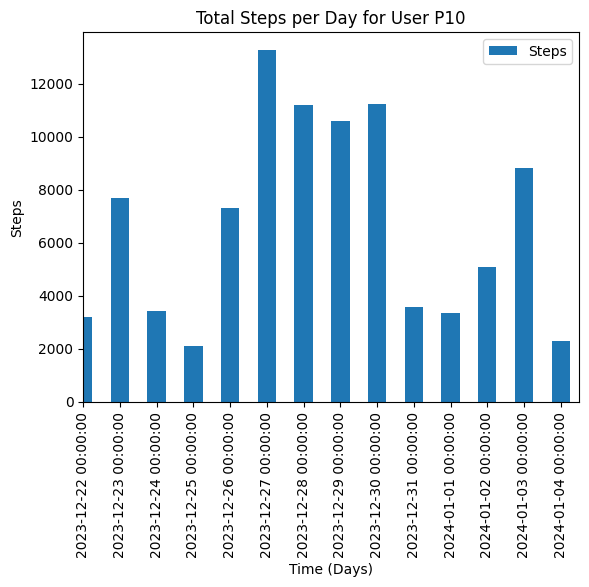

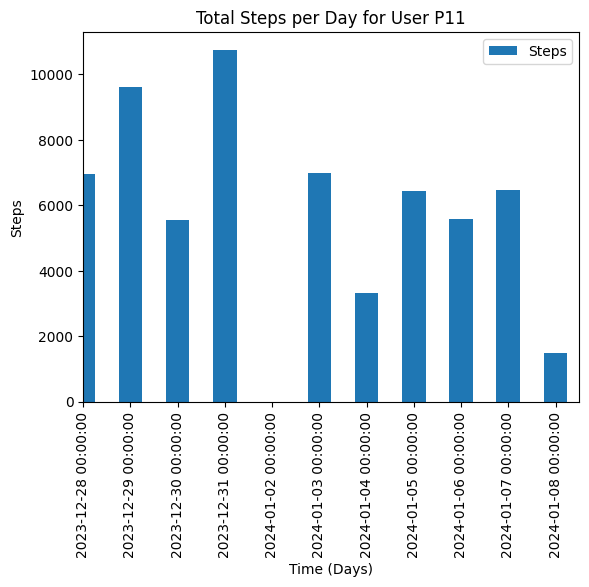

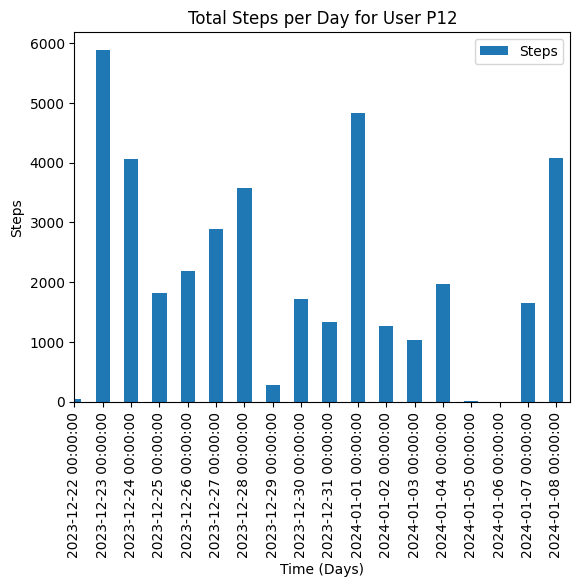

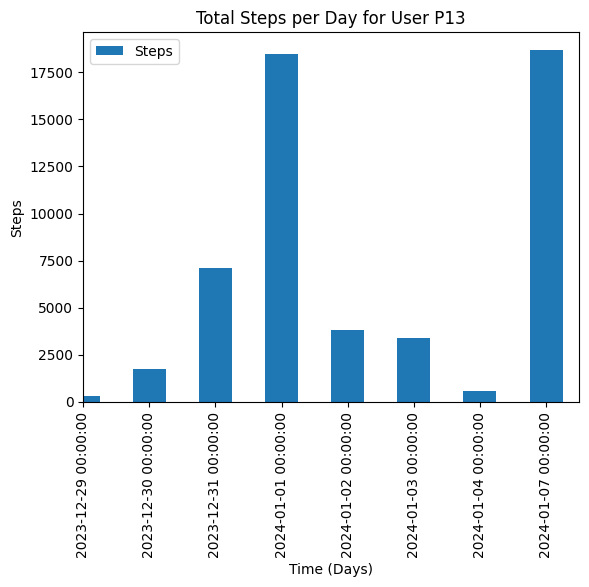

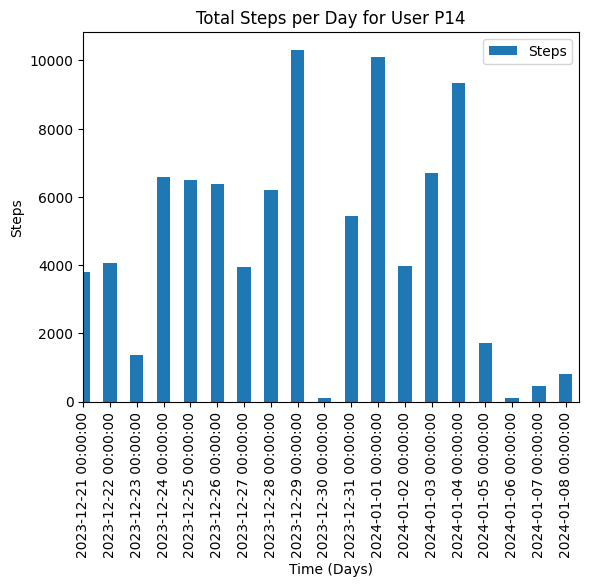

In [24]:
for user in d_df['User First Name'].unique():
    df_user_1 = d_df[d_df['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Steps', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Steps")
    plt.xlabel("Time (Days)")
    plt.title("Total Steps per Day for User " + user)
    
    plt.show()

# Total Sleep per User

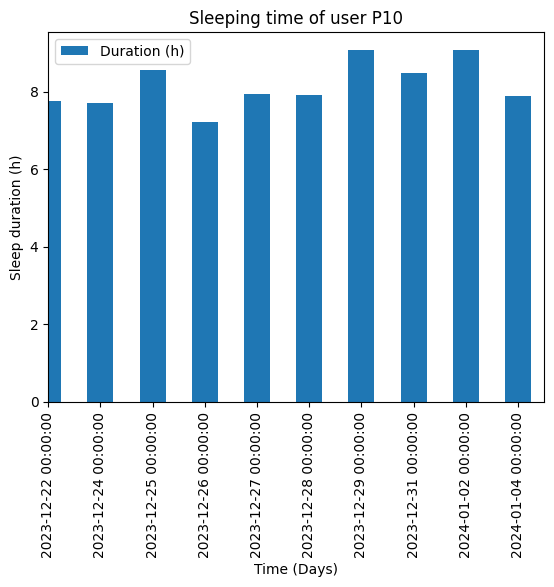

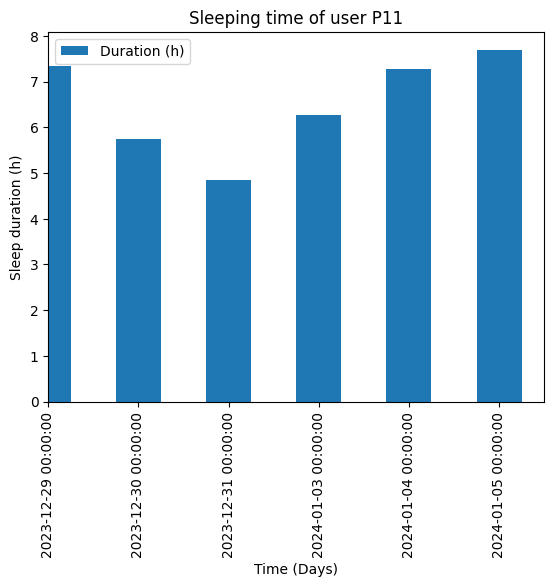

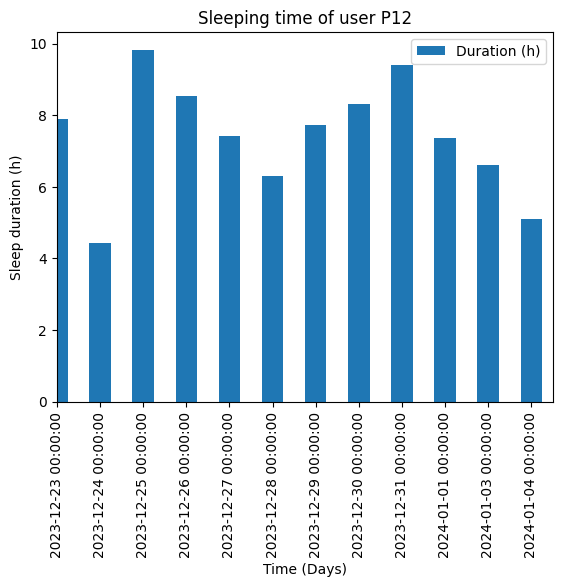

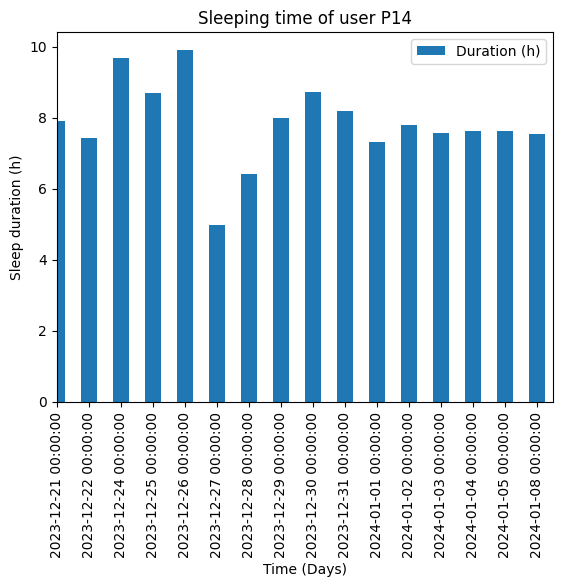

In [25]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Duration (h)', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Sleep duration (h)")
    plt.xlabel("Time (Days)")
    plt.title("Sleeping time of user " + user)
    
    plt.show()

# Sleep Quality per User

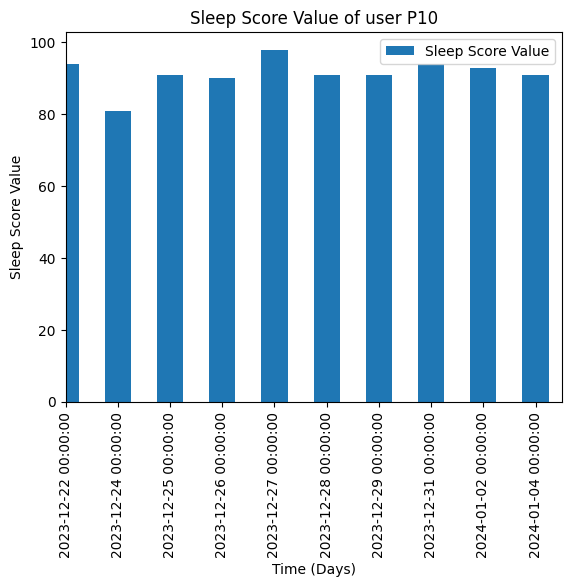

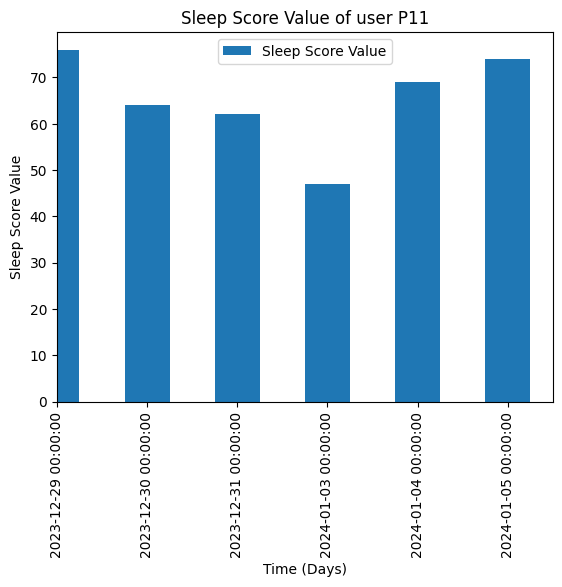

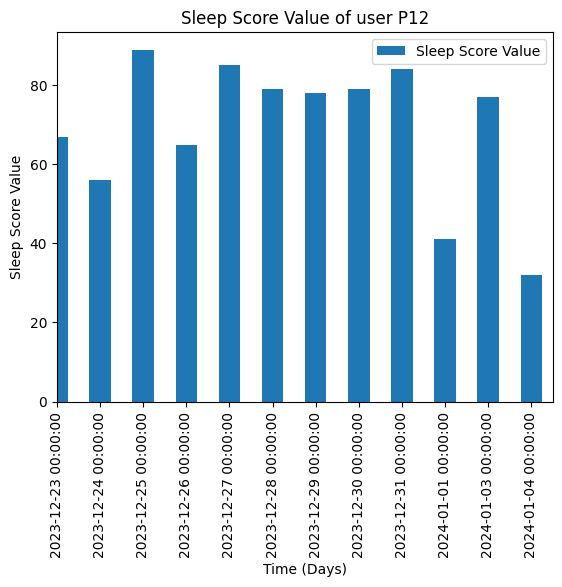

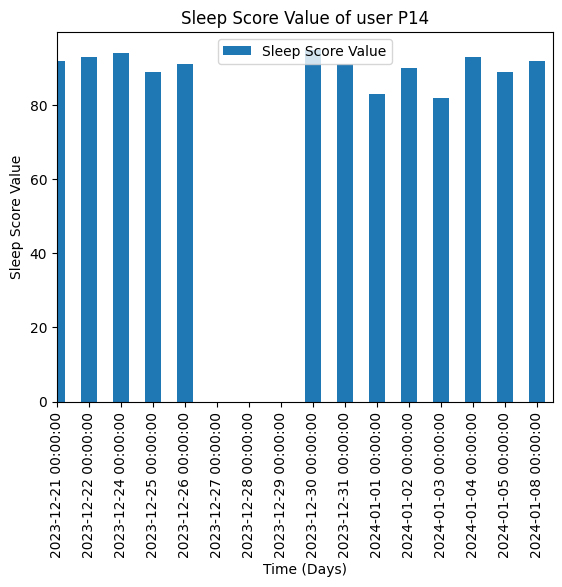

In [26]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Sleep Score Value', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Sleep Score Value")
    plt.xlabel("Time (Days)")
    plt.title("Sleep Score Value of user " + user)
    
    plt.show()

# Correlation between Steps and Sleep

In [38]:
# Trim columns
s_df_t = df_users.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Duration (h)', 'Source', 'Sleep Efficiency', 'Sleep Score Value']]
d_df_t = d_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Steps', 'Distance  (m)', 'Stress Duration (s)', 'Stress Level (avg)']]

# Join Sleep Dataset with Dailies Dataset
df_merged = pd.merge(s_df_t, d_df_t, on='Calendar Date (Local)', how='inner')

df_merged.drop_duplicates(ignore_index=True, inplace=True)

# Group glucose by day
#df_merged = pd.DataFrame(df_merged.groupby(df_merged['Calendar Date (Local)'].dt.date)['Steps'].max())
df_merged.drop_duplicates(inplace=True, subset=['Calendar Date (Local)', 'User First Name_x'])

# Filter for device source
df_merged = df_merged[df_merged['Source'] == 'device']

df_merged

,User First Name_x,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Duration (h),Source,Sleep Efficiency,Sleep Score Value,User First Name_y,Steps,Distance (m),Stress Duration (s),Stress Level (avg)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,7.766667,device,1.000000,94.0,P10,3183,2419.080005,NaN,NaN
3,P14,2023-12-22,2023-12-22T22:50:00,2023-12-23T06:16:00,26760,7.433333,device,0.995516,93.0,P10,3183,2419.080005,NaN,NaN
6,P10,2023-12-24,2023-12-24T01:13:00,2023-12-24T08:56:00,27780,7.716667,device,0.958963,81.0,P10,3409,2590.840038,0.0,0.0
9,P12,2023-12-24,2023-12-24T00:48:00,2023-12-24T05:14:40,16000,4.444444,device,0.996250,56.0,P10,3409,2590.840038,0.0,0.0
12,P14,2023-12-24,2023-12-24T00:05:00,2023-12-24T09:45:00,34800,9.666667,device,0.994828,94.0,P10,3409,2590.840038,0.0,0.0
15,P10,2023-12-25,2023-12-25T01:07:00,2023-12-25T09:41:00,30840,8.566667,device,1.000000,91.0,P10,2099,1595.239993,63900.0,40.0
18,P12,2023-12-25,2023-12-25T00:31:00,2023-12-25T10:21:00,35400,9.833333,device,0.947458,89.0,P10,2099,1595.239993,63900.0,40.0
21,P14,2023-12-25,2023-12-25T00:10:00,2023-12-25T08:52:00,31320,8.700000,device,0.977012,89.0,P10,2099,1595.239993,63900.0,40.0
24,P10,2023-12-26,2023-12-26T01:50:00,2023-12-26T09:03:00,25980,7.216667,device,1.000000,90.0,P10,7316,5592.560089,40260.0,37.0
27,P12,2023-12-26,2023-12-26T01:06:00,2023-12-26T09:38:00,30720,8.533333,device,0.882812,65.0,P10,7316,5592.560089,40260.0,37.0


Correlation Coefficient: -0.021476123979147423


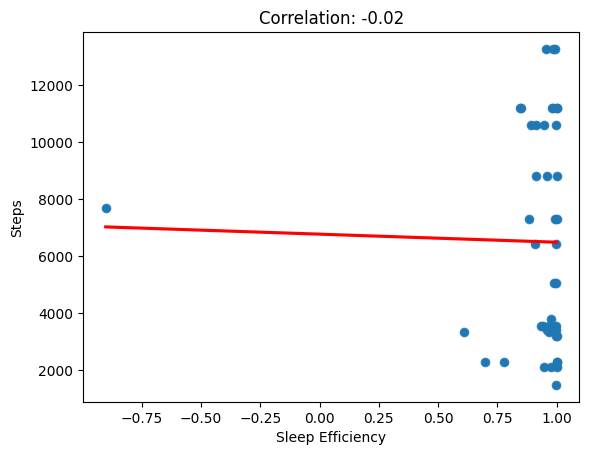

In [41]:
column1 = df_merged['Sleep Efficiency']
column2 = df_merged['Steps']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: -0.1586764073841778


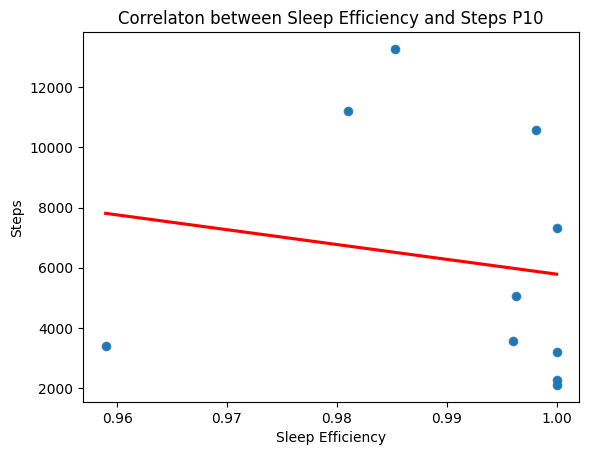

Correlation Coefficient: -0.012841092800460604


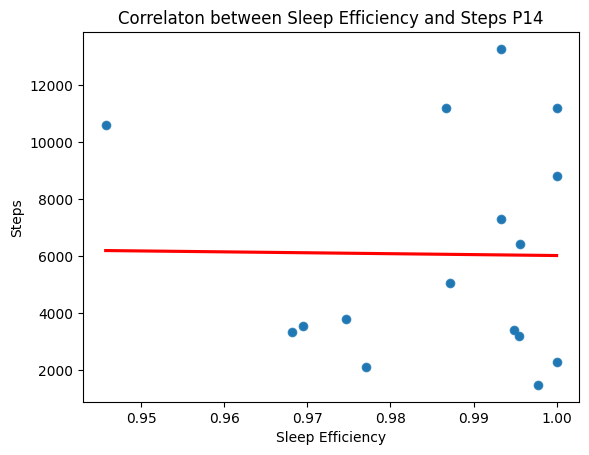

Correlation Coefficient: 0.022114636489825715


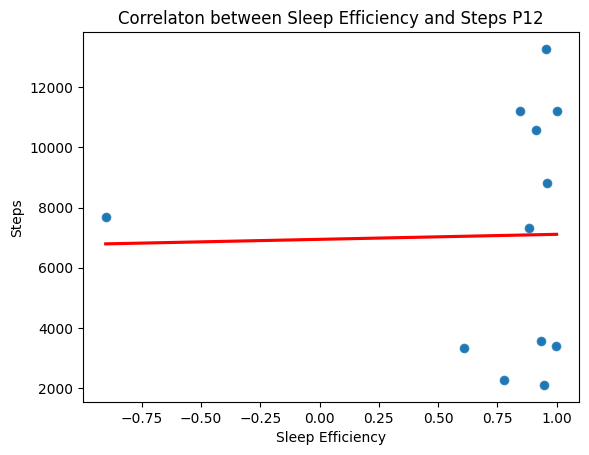

Correlation Coefficient: 0.37792669344540236


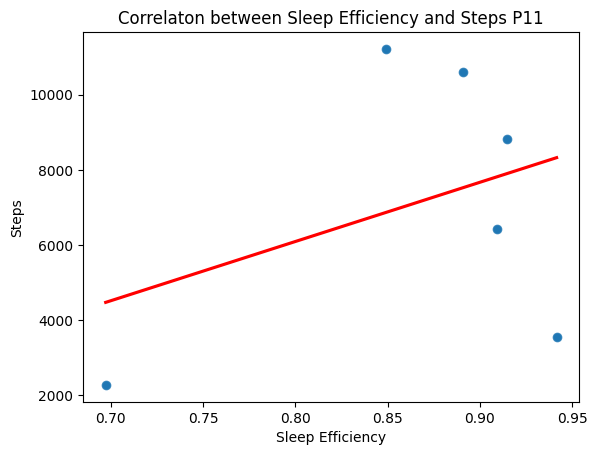

In [44]:
for user in df_merged['User First Name_x'].unique():
    df_merged_x = df_merged[df_merged['User First Name_x'] == user]
    column1 = df_merged_x['Sleep Efficiency']
    column2 = df_merged_x['Steps']

    # Calculate the correlation coefficient
    correlation_coefficient = column1.corr(column2)

    print(f'Correlation Coefficient: {correlation_coefficient}')

    # Create a scatter plot
    sns.scatterplot(x=column1, y=column2)

    # Add a regression line and correlation coefficient
    sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
    plt.title("Correlaton between Sleep Efficiency and Steps " + user)

    # Display the plot
    plt.show()

Correlation Coefficient: 0.021782683872652423


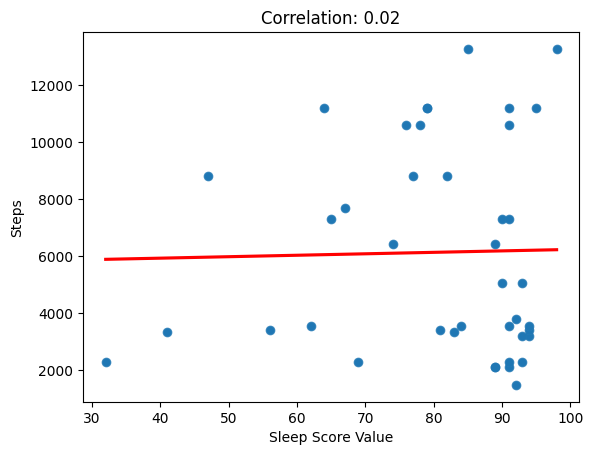

In [46]:
column1 = df_merged['Sleep Score Value']
column2 = df_merged['Steps']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.35375373706317403


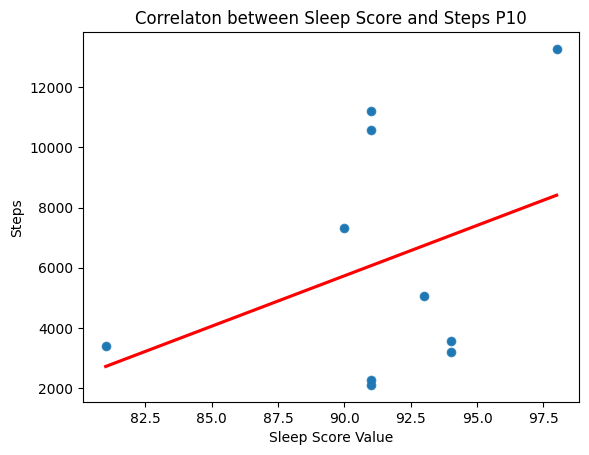

Correlation Coefficient: -0.10396411122210168


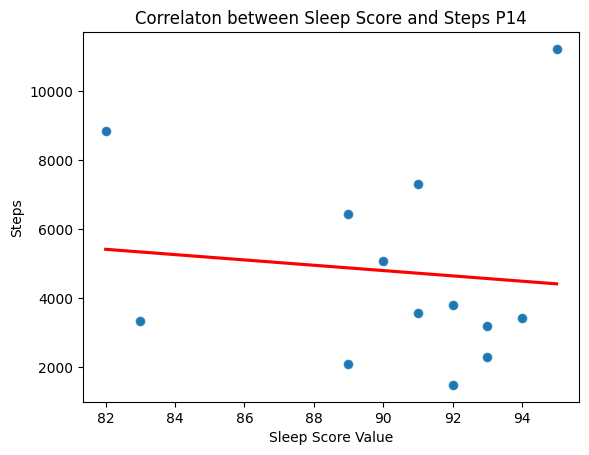

Correlation Coefficient: 0.5084641766590534


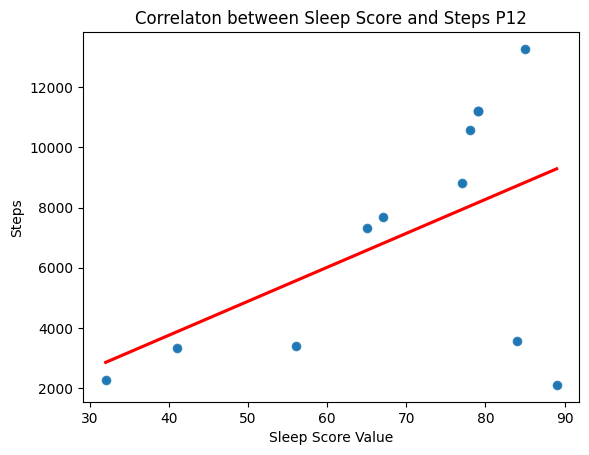

Correlation Coefficient: -0.059360758016830696


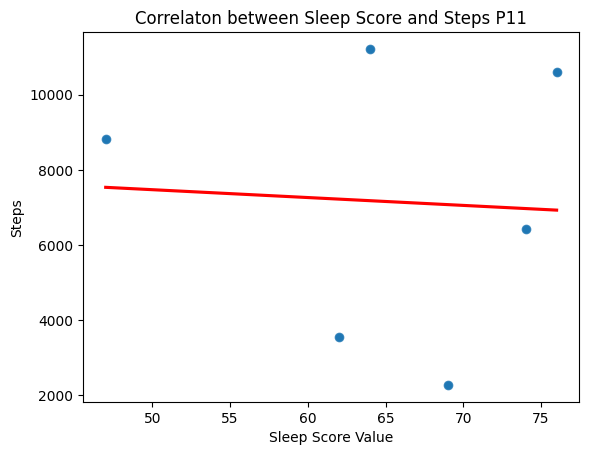

In [47]:
for user in df_merged['User First Name_x'].unique():
    df_merged_x = df_merged[df_merged['User First Name_x'] == user]
    column1 = df_merged_x['Sleep Score Value']
    column2 = df_merged_x['Steps']

    # Calculate the correlation coefficient
    correlation_coefficient = column1.corr(column2)

    print(f'Correlation Coefficient: {correlation_coefficient}')

    # Create a scatter plot
    sns.scatterplot(x=column1, y=column2)

    # Add a regression line and correlation coefficient
    sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
    plt.title("Correlaton between Sleep Score and Steps " + user)

    # Display the plot
    plt.show()